# Random Forest - Regression

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv(r'bike_sharing_daily.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


 Metrics:

Mean Square Error: 66387.59833389346
R^2 Score: 0.9825350441723719



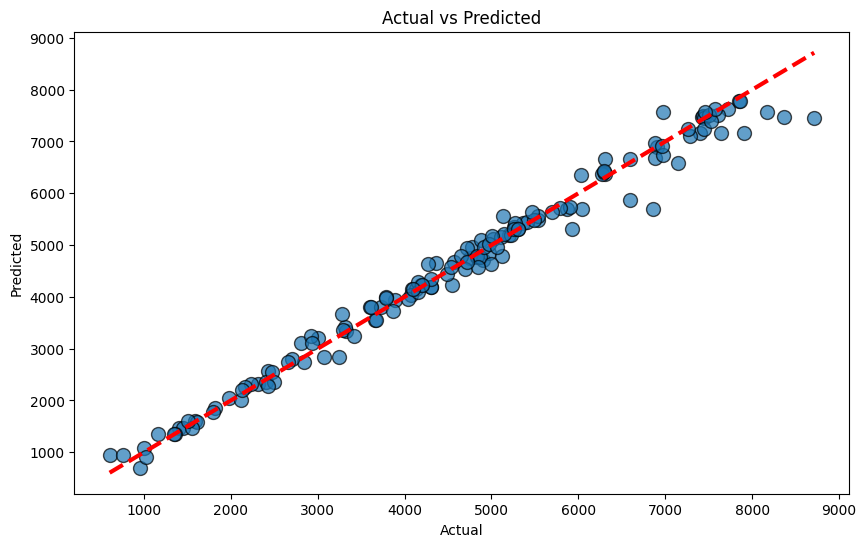

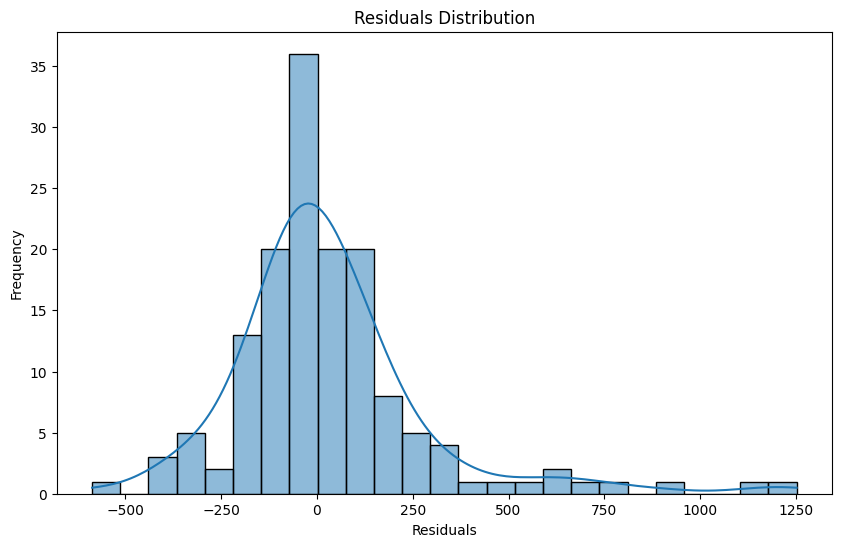

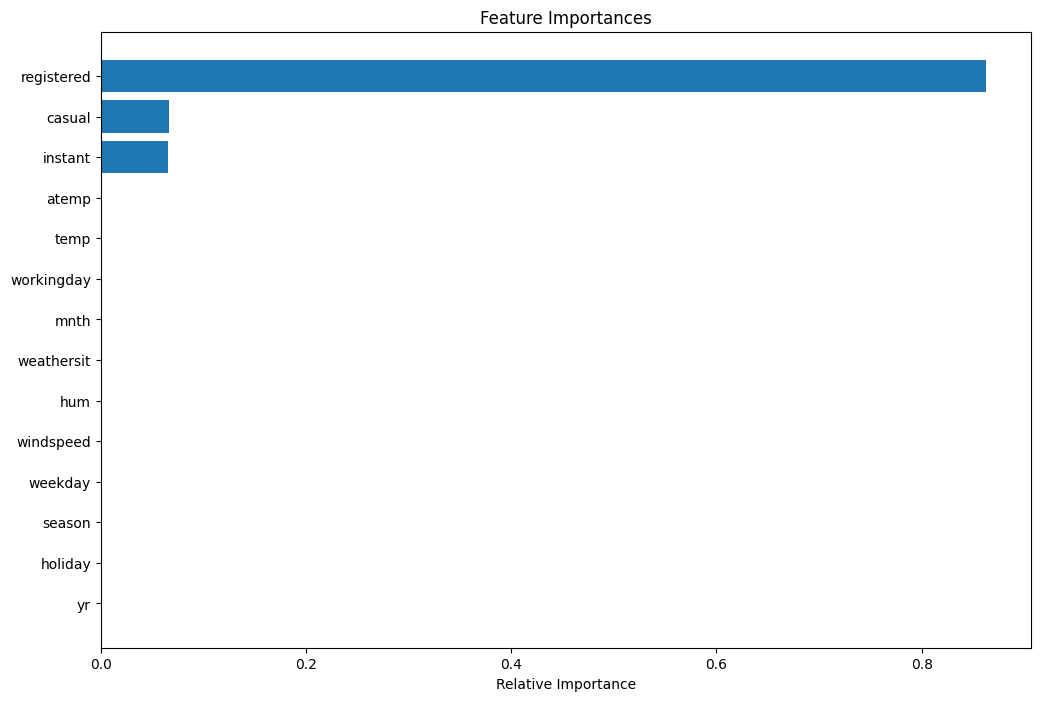

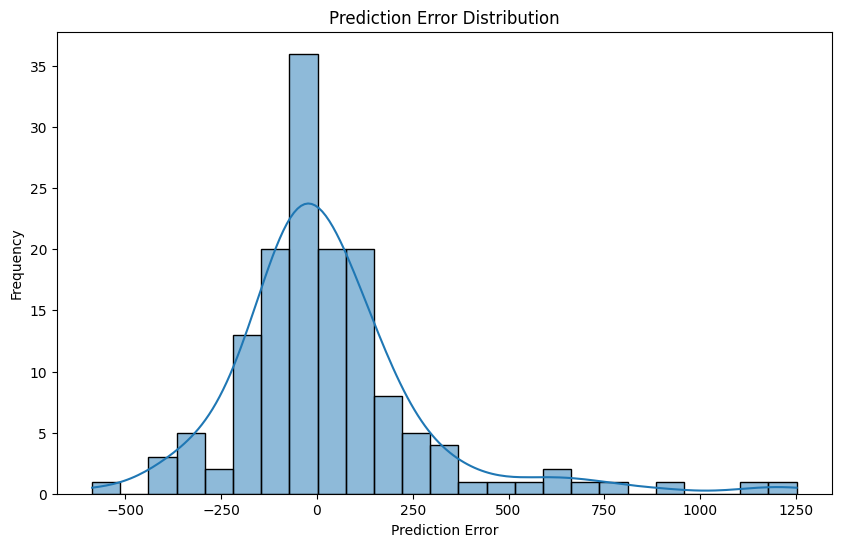

In [29]:
df_new = df.copy()
df_new = df_new.dropna()
df_new = df_new.drop(['dteday'], axis=1)

x = df_new.iloc[:, :-1]
y = df_new.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

model = RandomForestRegressor(n_estimators=3, max_depth=10, min_samples_split=10,criterion='squared_error', random_state=10)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mean_squared_error = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f''' Metrics:

Mean Square Error: {mean_squared_error}
R^2 Score: {r2}
''')

# 1. Actual vs Predicted Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7, s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# 2. Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

# 3. Feature Importances
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [x.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# 4. Prediction Error Distribution
error = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(error, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')
plt.show()